References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-7-derivatives-of-inverse-functions
    
[2] Checkpoint 3.43
$$
\begin{equation}
g(x)=\sqrt[5]{x}
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, x**(1/5))
x:[ 0.    0.55  1.1   1.65  2.2   2.75  3.3   3.85  4.4   4.95  5.5   6.05
  6.6   7.15  7.7   8.25  8.8   9.35  9.9  10.45 11.  ]
y:[0.0, 0.887304201366326, 1.01924487649146, 1.10534229649287, 1.17080491296489, 1.22423992536427, 1.26970487769000, 1.30945972654651, 1.34490167754522, 1.37695909760684, 1.40628238838764, 1.43334611926427, 1.45850790433422, 1.48204437836496, 1.50417423381885, 1.52507355253887, 1.54488634462895, 1.56373199486901, 1.58171065031917, 1.59890719965973, 1.61539426620218]
f′(x)=1/(5*x**(4/5))
f′(2)=0.114869835499704
y_tangent:[0.918958683997628 0.982137093522465 1.04531550304730 1.10849391257214
 1.17167232209698 1.23485073162181 1.29802914114665 1.36120755067149
 1.42438596019632 1.48756436972116 1.55074277924600 1.61392118877083
 1.67709959829567 1.74027800782051 1.80345641734535 1.86663482687018
 1.92981323639502 1.99299164591986 2.05617005544469 2.11934846496953
 2.1825

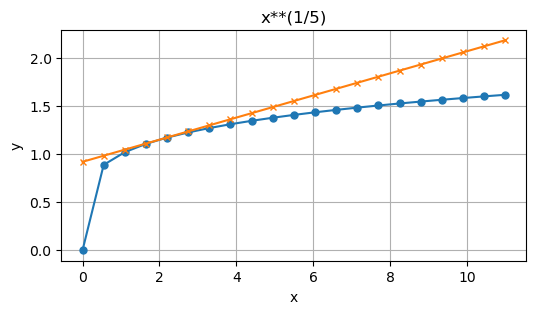

In [11]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, sp.root(x, 5))
print(f)

x_values = np.linspace(0, 11, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()